# Problem Statement:
 Two political parties A and B are contesting for upcomming elections. We would like to know percentage/fraction for people vote for party A.
 Obviously we cannot conduct survey on the large population in the country. We will  sample 10 people randomly and take their opinion. We will
 repeat this process say 100 times. 
 
Infer the fractions of votes party A would get.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Let the fraction of  people who vote for party A be theta

# Theta could be any thing between 0.0 to 1.0 we don't know certainly. There is uncertanity involved. Hence use probabillity

theta = np.arange(0, 1.1, 0.1)
n = theta.shape[0]

# probability(theta)
#  Since we don't know the prob(theta) take uniform distribution
prob_theta = np.repeat(1/n, n)

# Now, we have sampled let us say we have randomly sampled10 people from the population and took their opion.
#  It is noted that 6 would vote for party A

# Now, with the new piece of this information our initial assumption about the p(theta) should change according to bayes rule
# p(A\B) = p(B\A) * p(A) / p(B)
A, B = 6, 4
prob_data_given_theta = theta**6 * (1- theta)**4 

In [20]:
h = prob_data_given_theta*prob_theta
z = np.sum(h)

prob_theta_given_data = h/z

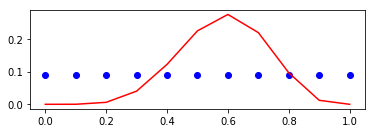

In [24]:
plt.subplot(212)
plt.plot(theta, prob_theta, 'bo')
plt.plot(theta,  prob_theta_given_data, 'r')
plt.show()

In [26]:
theta[prob_theta_given_data == np.max(prob_theta_given_data)]

array([0.6])

In [74]:
theta = np.arange(0,1.1,0.1)

n = theta.shape[0]
prior = np.repeat(1/n, n)

In [75]:
no_of_iterations = 0
while no_of_iterations < 100:
    # sample 10 people and ask opinion to compute fraction vote for A
    u = np.random.randint(0,11)
    v = 10 - u
    
    # compute the likelihood
    likelihood = theta**u * (1-theta)**v
    
    # likelihood* prior
    h = likelihood*prior    
    
    # normalization
    z = np.sum(h)
    
    posterior = h/z
    
    prior  = posterior
    no_of_iterations += 1

In [76]:
posterior

array([0.00000000e+000, 1.03270888e-219, 7.87348426e-096, 1.75215848e-037,
       4.61201058e-009, 9.99999995e-001, 4.04895305e-010, 1.08570709e-039,
       1.92223737e-099, 1.94322394e-225, 0.00000000e+000])

In [78]:
theta[posterior== np.max(posterior)]

array([0.5])

In [ ]:
# Hence, There is high chance of 0.5 fraction or 50% will vote for party A